**Brian Blaylock**  
*December 18, 2020*

# 🌎 ABI Geostationary **field-of-view** in Cartopy

- [GOES-R Series Data Book](https://www.goes-r.gov/downloads/resources/documents/GOES-RSeriesDataBook.pdf)
    - Full Disk Coverage: Defined as a 17.4 degree diameter circle (pg 48)


In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

from goes2go.data import goes_latest, goes_nearesttime

from BB_maps.add_to_cartopy import common_features, pc

WARNING! No module named 'dask'
Without dask, you cannot use dask for multiprocessing.


/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:33: UserWarning: No module named 'geopandas' Without geopandas, you cannot subset some NaturalEarthFeatures, like "Major Highways" from roads.
  warnings.warn(


In [2]:
# Testing Phase
gcentral = goes_nearesttime(datetime(2017,10,5), satellite='G16', product='ABI')

# GOES East
g16 = goes_latest(satellite='G16', product='ABI')

# GOES West
g17 = goes_latest(satellite='G17', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Get the data's coordinate reference system and field of view with the `goes2go.tools.field_of_view` function
This returns both the field of view as a shapely polygon and the cartopy coordinate reference system.

In [3]:
g16.FOV.crs

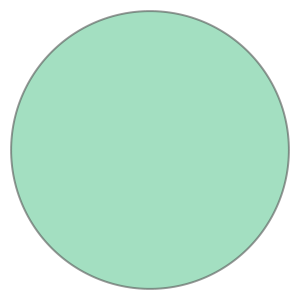

In [4]:
g16.FOV.full_disk   # See, the FOV is just a shapely polygon

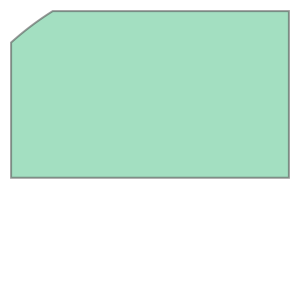

In [5]:
g16.FOV.domain  # See the FOV for the ABI product domain (CONUS)

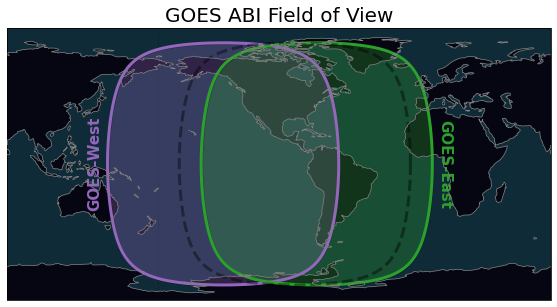

In [9]:
ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=ccrs.PlateCarree(central_longitude=-100), 
                     figsize=[10,5], 
                     dark=True)


# Draw boundary of GOES17
ax.add_geometries([g17.FOV.full_disk], crs=g17.FOV.crs,
                   facecolor='tab:purple', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([g17.FOV.full_disk], crs=g17.FOV.crs,
                   facecolor='none', edgecolor='tab:purple', alpha=1, linewidth=3, zorder=10)

# Draw boundary of GOES16
ax.add_geometries([g16.FOV.full_disk], crs=g16.FOV.crs,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([g16.FOV.full_disk], crs=g16.FOV.crs,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3, zorder=10)

# Draw boundary of GOES-Central (test phase)
ax.add_geometries([gcentral.FOV.full_disk], crs=gcentral.FOV.crs,
                   facecolor='none', edgecolor='k', alpha=.4, linewidth=3, linestyle='--', zorder=11)


ax.text(g17.geospatial_lat_lon_extent.geospatial_lon_nadir-90,
        g17.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-West', transform=pc,
       rotation=90, va='center', fontsize=15, color='tab:purple', fontweight='bold')

ax.text(g16.geospatial_lat_lon_extent.geospatial_lon_nadir+80,
        g16.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-East', transform=pc,
       rotation=-90, va='center', fontsize=15, color='tab:green', fontweight='bold')

plt.title('GOES ABI Field of View', fontsize=20)

plt.savefig('../images/ABI_field-of-view.png')
plt.savefig('../docs/_static/ABI_field-of-view.png')

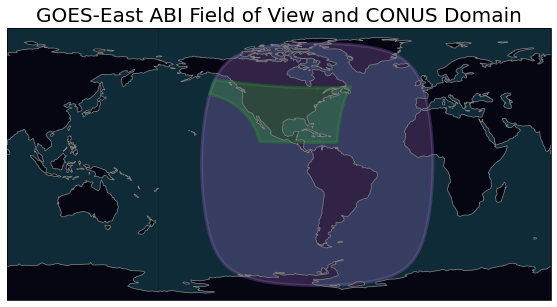

In [10]:
ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=ccrs.PlateCarree(central_longitude=-100), 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [g16.FOV.full_disk], crs=g16.FOV.crs, facecolor="tab:purple", edgecolor="tab:purple", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [g16.FOV.domain], crs=g16.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-East ABI Field of View and CONUS Domain', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_16dom.png')

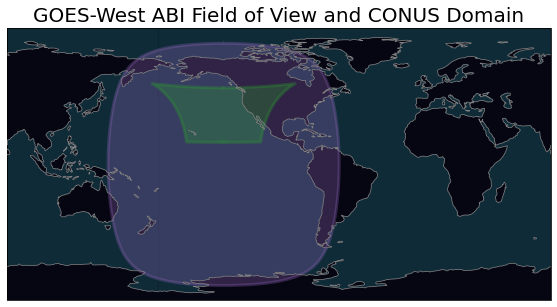

In [11]:
ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=ccrs.PlateCarree(central_longitude=-100), 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [g17.FOV.full_disk], crs=g17.FOV.crs, facecolor="tab:purple", edgecolor="tab:purple", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [g17.FOV.domain], crs=g17.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-West ABI Field of View and CONUS Domain', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_17dom.png')

In [15]:
crs_16.proj4_params

{'a': 6378137.0,
 'b': 6356752.31414,
 'rf': 298.2572221,
 'proj': 'geos',
 'lon_0': -75.0,
 'lat_0': 0.0,
 'h': 35786023.0,
 'x_0': 0,
 'y_0': 0,
 'units': 'm',
 'sweep': 'x'}

In [16]:
crs_central.proj4_params

{'a': 6378137.0,
 'b': 6356752.31414,
 'rf': 298.2572221,
 'proj': 'geos',
 'lon_0': -89.5,
 'lat_0': 0.0,
 'h': 35786023.0,
 'x_0': 0,
 'y_0': 0,
 'units': 'm',
 'sweep': 'x'}

In [17]:
crs_17.proj4_params

{'a': 6378137.0,
 'b': 6356752.31414,
 'rf': 298.2572221,
 'proj': 'geos',
 'lon_0': -137.0,
 'lat_0': 0.0,
 'h': 35786023.0,
 'x_0': 0,
 'y_0': 0,
 'units': 'm',
 'sweep': 'x'}

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPM    |
 |    Domain: M1               |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPM].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


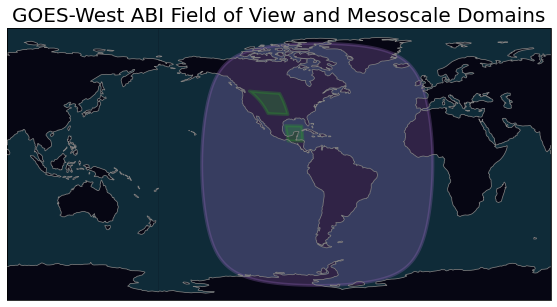

In [13]:
M1 = goes_latest(domain="M1")
M2 = goes_latest(domain="M2")

ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=ccrs.PlateCarree(central_longitude=-100), 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [M1.FOV.full_disk], crs=M1.FOV.crs, facecolor="tab:purple", edgecolor="tab:purple", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [M1.FOV.domain], crs=M1.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [M2.FOV.domain], crs=M2.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-West ABI Field of View and Mesoscale Domains', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_16M1M2.png')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPM    |
 |    Domain: M1               |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPM].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

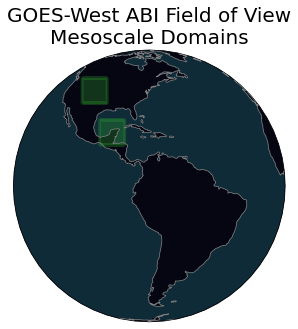

In [16]:
M1 = goes_latest(domain="M1")
M2 = goes_latest(domain="M2")

ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=M1.FOV.crs, 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [M1.FOV.domain], crs=M1.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [M2.FOV.domain], crs=M2.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-West ABI Field of View\nMesoscale Domains', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_16M1M2_geo.png')

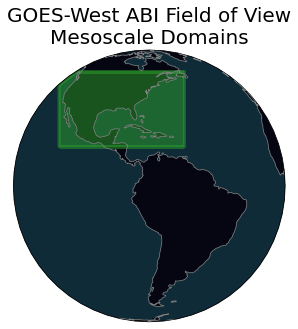

In [21]:
ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=g16.FOV.crs, 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [g16.FOV.domain], crs=g16.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [g16.FOV.domain], crs=g16.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-West ABI Field of View\nMesoscale Domains', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_16_geo.png')

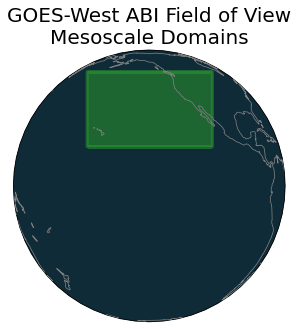

In [24]:
ax = common_features(OCEAN=True, 
                     LAND=True, 
                     crs=g17.FOV.crs, 
                     figsize=[10,5], 
                     dark=True)


ax.add_geometries(
    [g17.FOV.domain], crs=g17.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)
ax.add_geometries(
    [g17.FOV.domain], crs=g17.FOV.crs, facecolor="tab:green", edgecolor="tab:green", alpha=0.3, linewidth=3
)

plt.title('GOES-West ABI Field of View\nMesoscale Domains', fontsize=20)

plt.savefig('../docs/_static/ABI_field-of-view_17_geo.png')